In [ ]:
import numpy as np
import random
import multiprocessing
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


def hardselect(M,n,p):
    size = int(np.floor(n*p))
    degree_seq = np.array(np.sum(M, axis = 1)[0:n])
    if size == 0:
        taboo = np.array([], dtype = int)
    else:
        taboo = np.argpartition(degree_seq, -size)[-size:]
    return np.array(taboo)
    

def softselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #checked -- updates prob
    return taboo

def softselect_one(M,n):
    size = 1
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #checked -- updates prob
    return taboo

def simulate_graph(N,p, vertex = 1, mode = "hard",seed = 1):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    vertex_deg = np.array([])
    np.random.seed(seed)
    for i in range(2,N):
        if mode == "hard":
            taboo = hardselect(M,i,p)
        elif mode == "soft":
            taboo = softselect(M,i,p)
        elif mode == "soft_one":
            taboo = softselect_one(M,i)
        else:
            raise ValueError("no such mode of selecting taboo")
        
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
        if i >= vertex:
          vertex_deg = np.append(vertex_deg, np.sum(M, axis = 1)[vertex])


    
    #deg_seq = np.sum(M, axis = 1)
    #max_deg = max(np.sum(M, axis = 1))

    return vertex_deg

def find_fixed_mean_sd(N, p, S, vertex = 1, mode = "hard", seed = 1):
    inputs = range(0,S)
    mylist = []
    mylist = Parallel(n_jobs=-1)(delayed(simulate_graph)(N,p,vertex,mode,(seed+i)) for i in inputs)
    time = range(vertex, N)
    mean_t = np.array([])
    var_t = np.array([])
    sd_t = np.array([])
    for j in range(len(time)):
      deg_t = np.array([])
      for i in range(S):
        deg_t = np.append(deg_t, mylist[i][j])
      mean_t = np.append(mean_t, np.mean(deg_t))
      var_t = np.append(var_t, np.var(deg_t))
      sd_t = np.append(sd_t, np.sqrt(np.var(deg_t)))

    return time, mean_t, var_t, sd_t

Text(0, 0.5, 'standard deviation of D_i(t)')

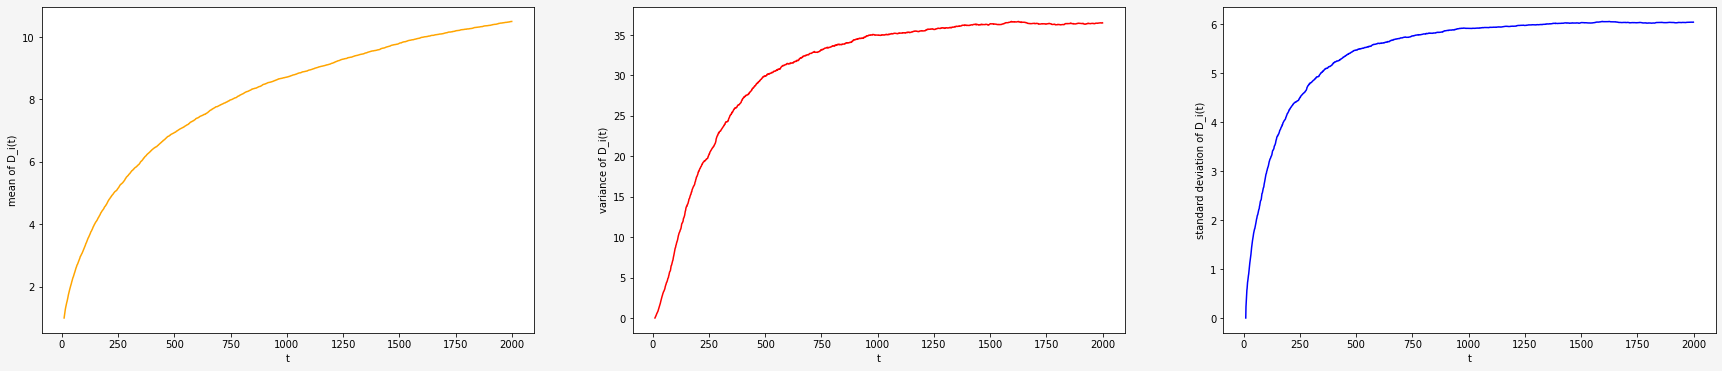

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =10; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

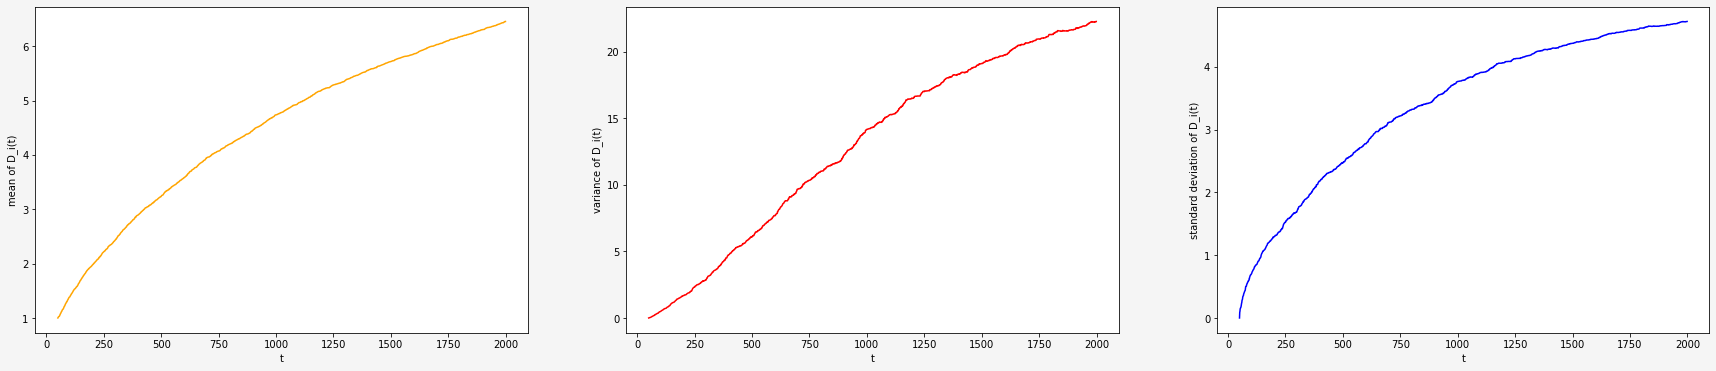

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =50; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

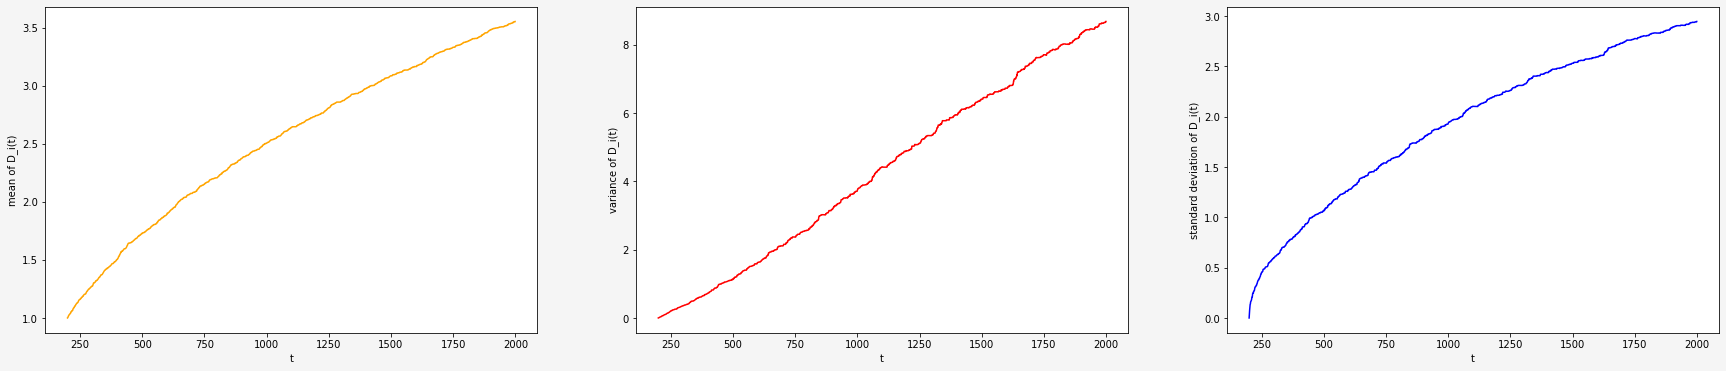

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =200; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

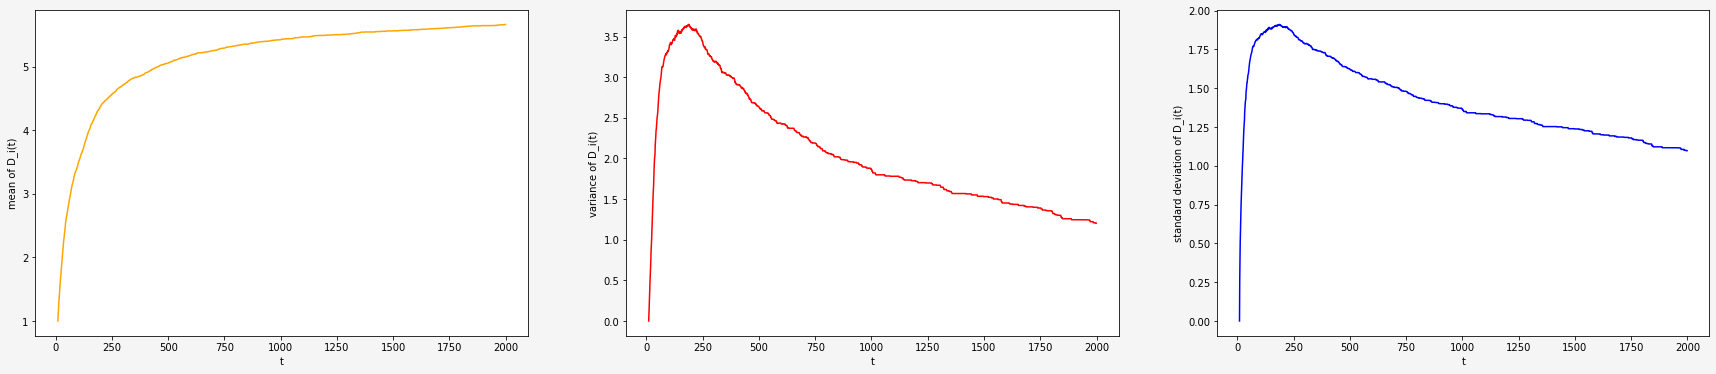

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =10; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

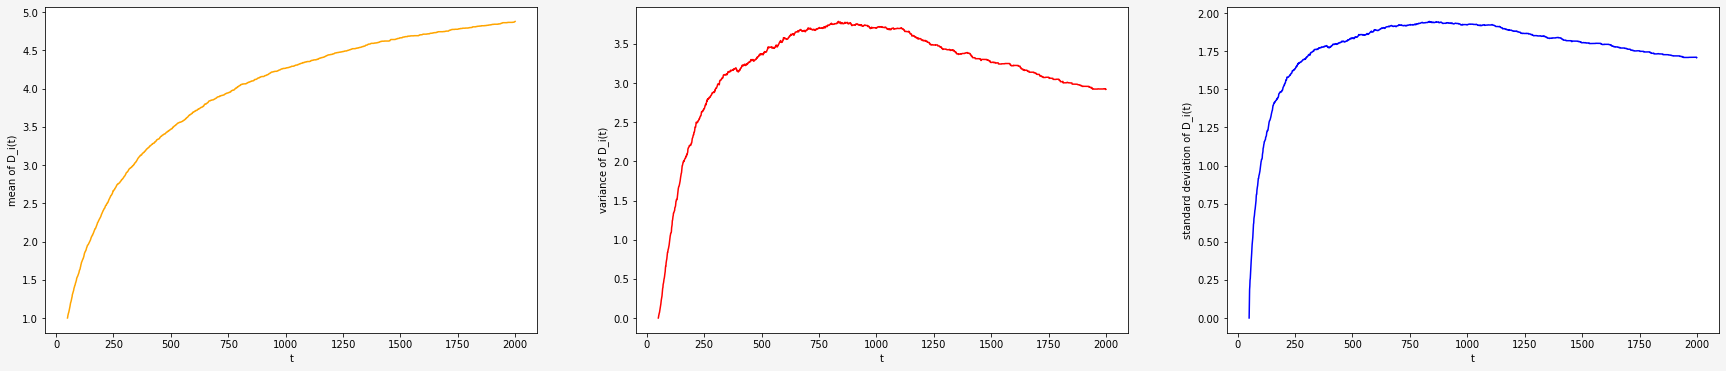

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =50; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

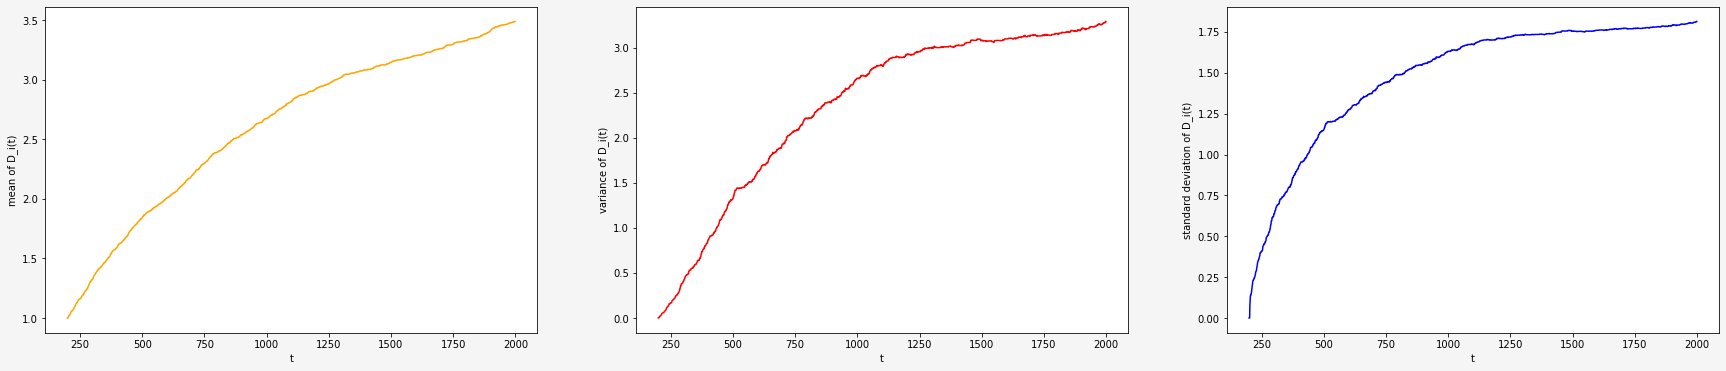

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =200; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

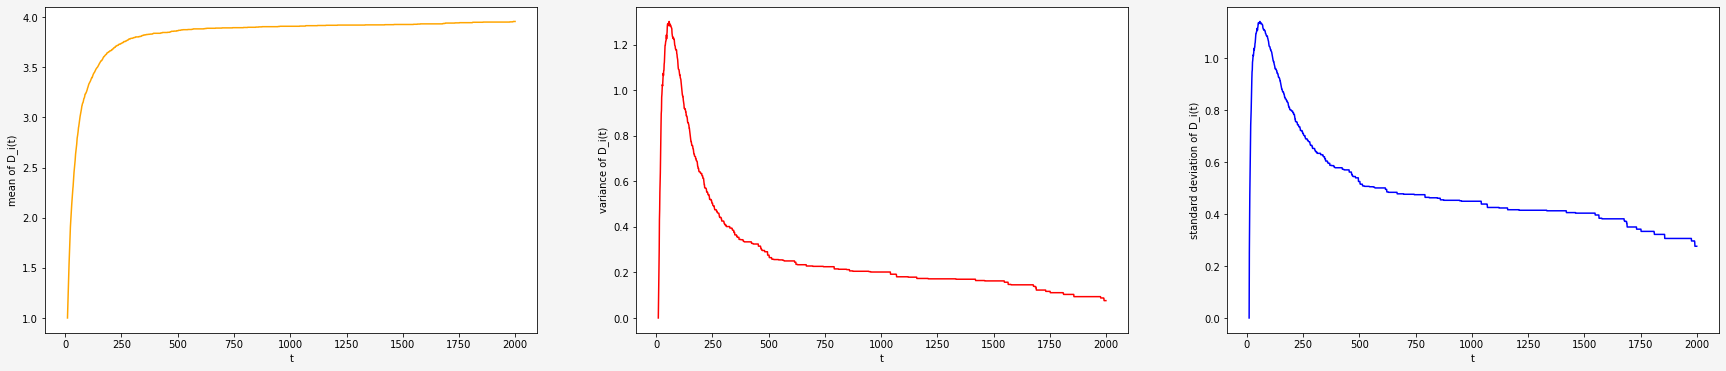

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =10; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

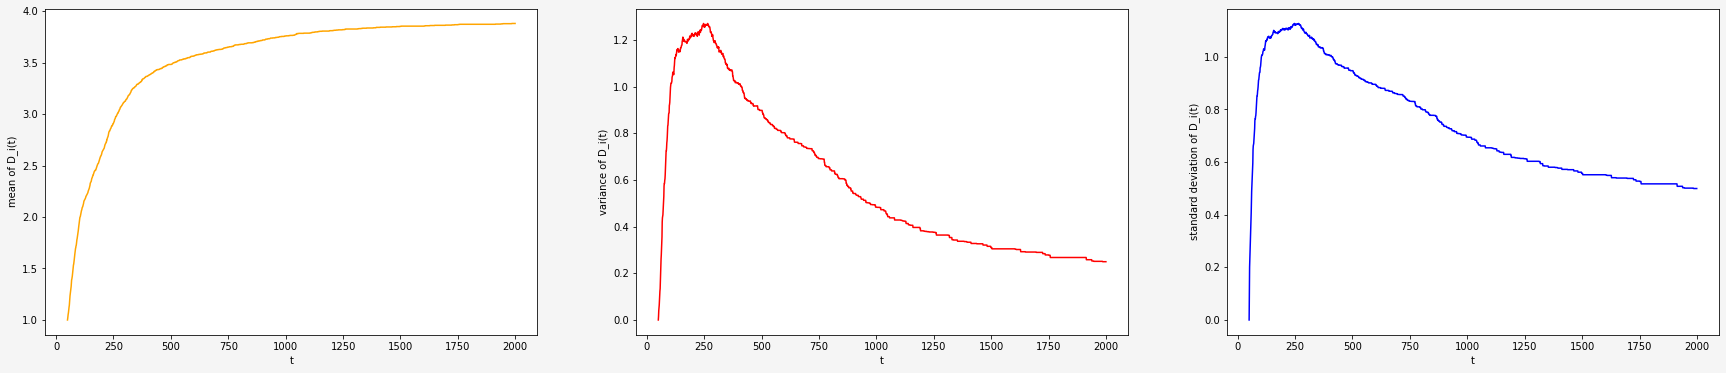

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =50; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

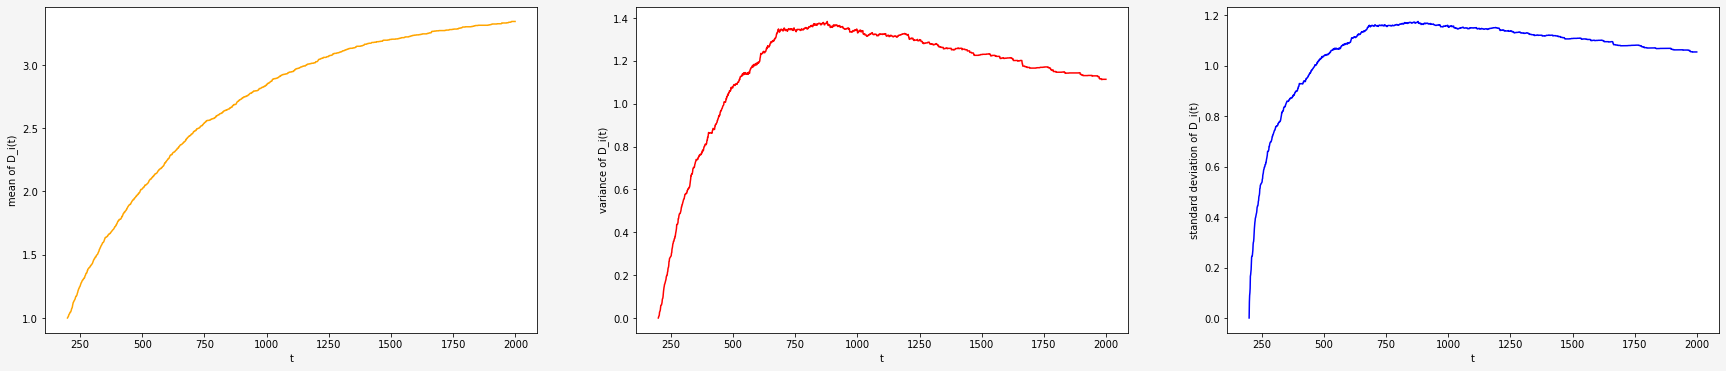

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =200; mode = "hard"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

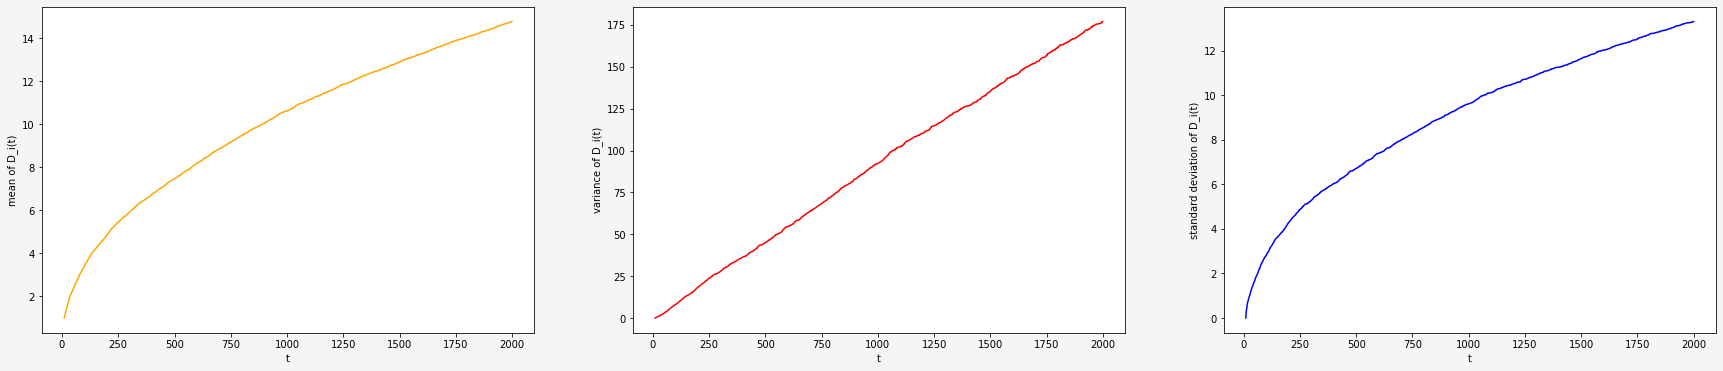

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =10; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

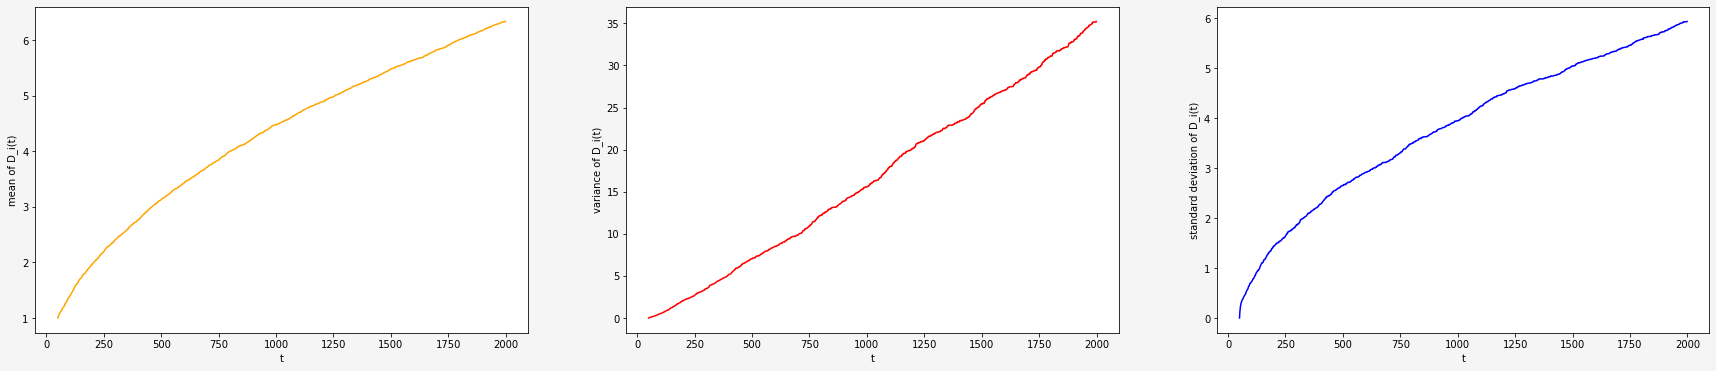

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =50; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

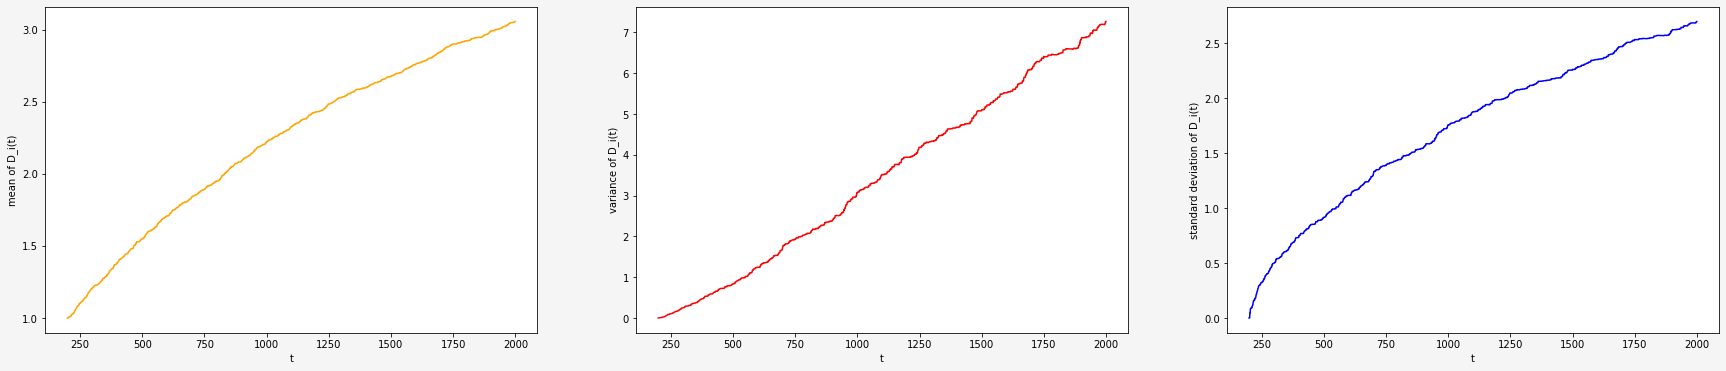

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =200; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

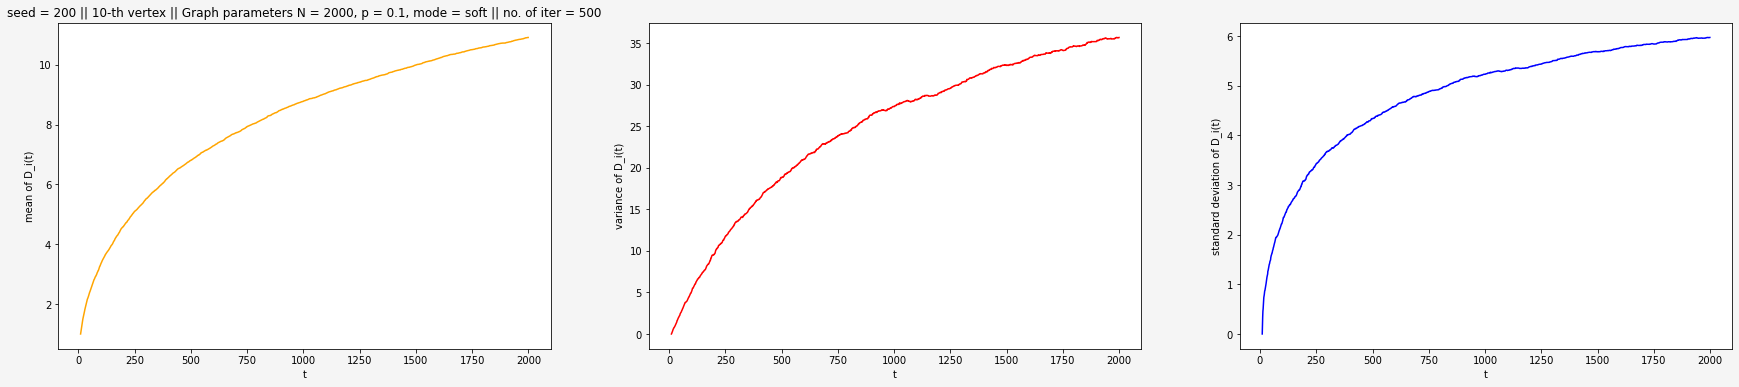

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =10; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.title(title)
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

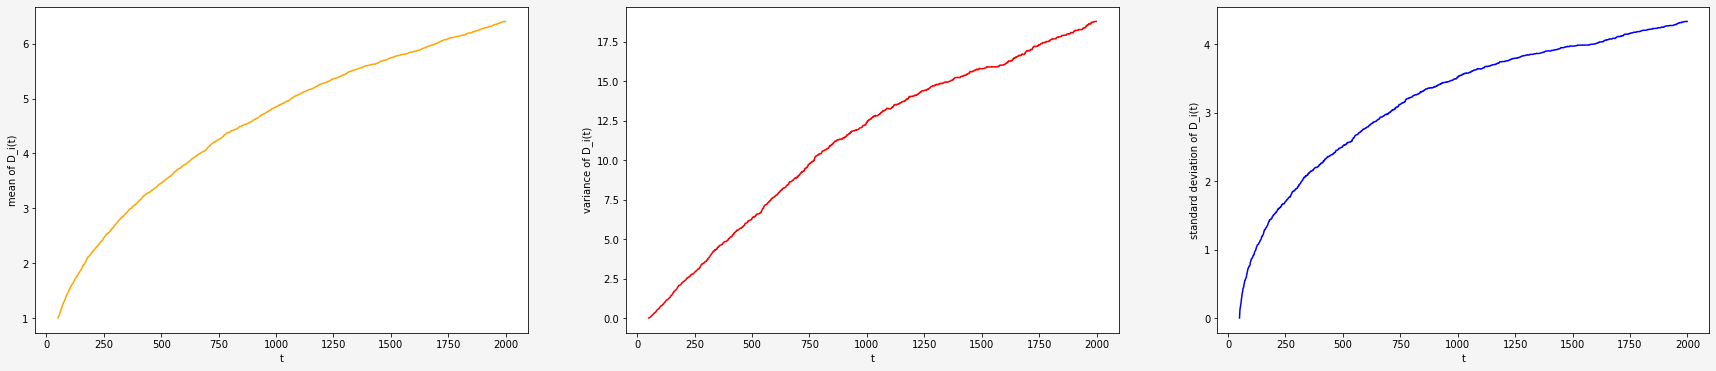

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =50; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

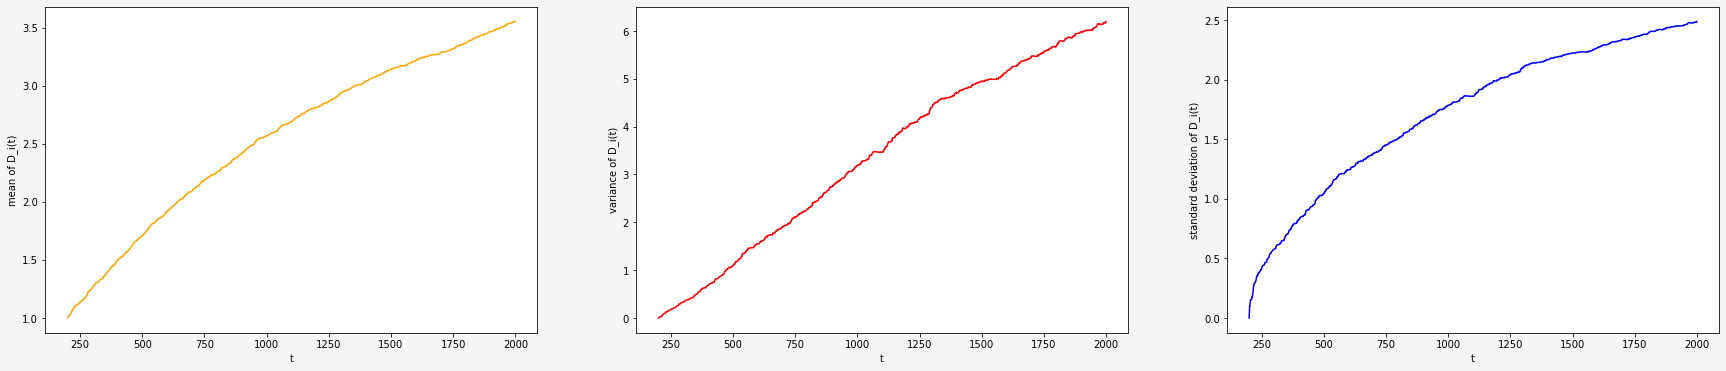

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =200; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

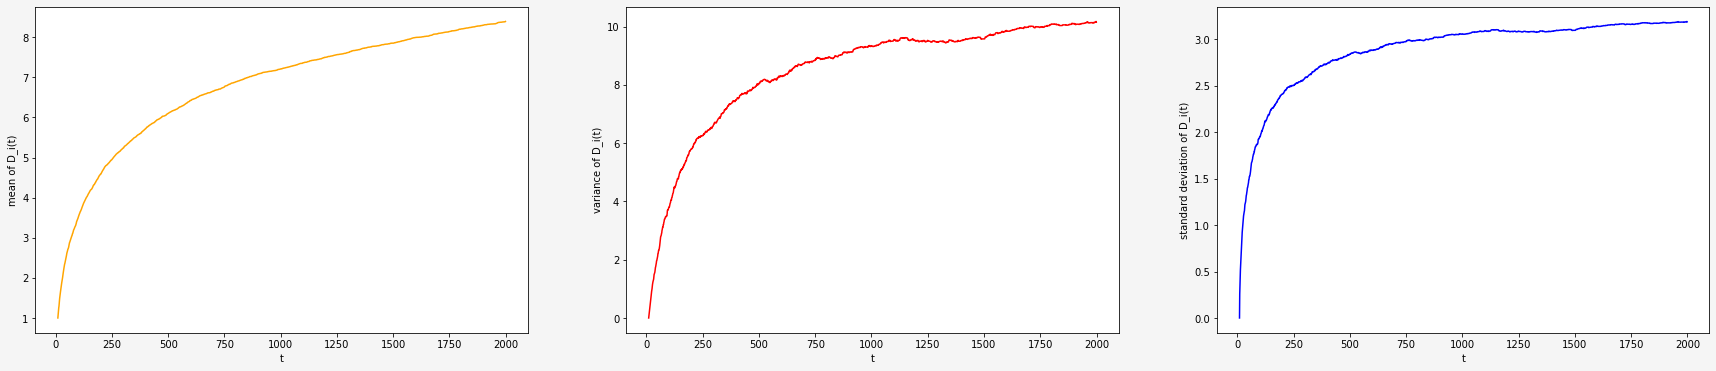

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =10; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

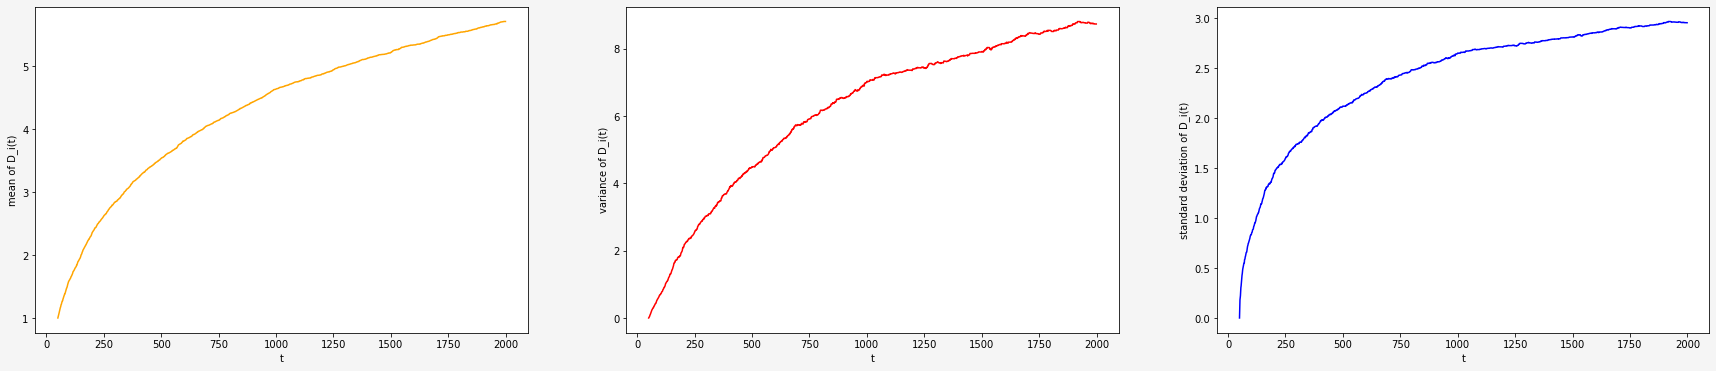

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =50; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

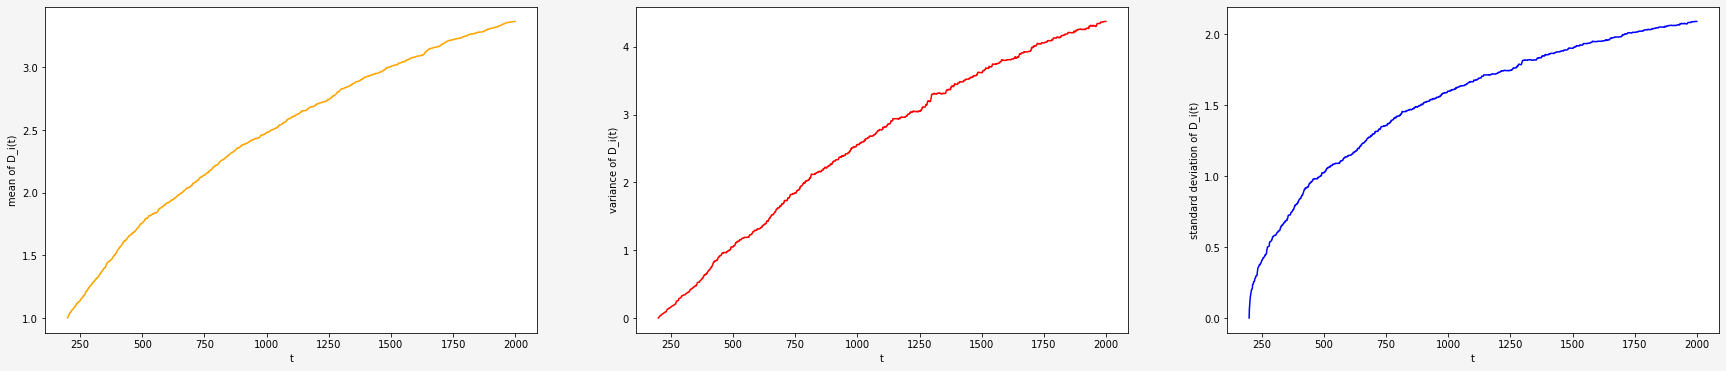

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =200; mode = "soft"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

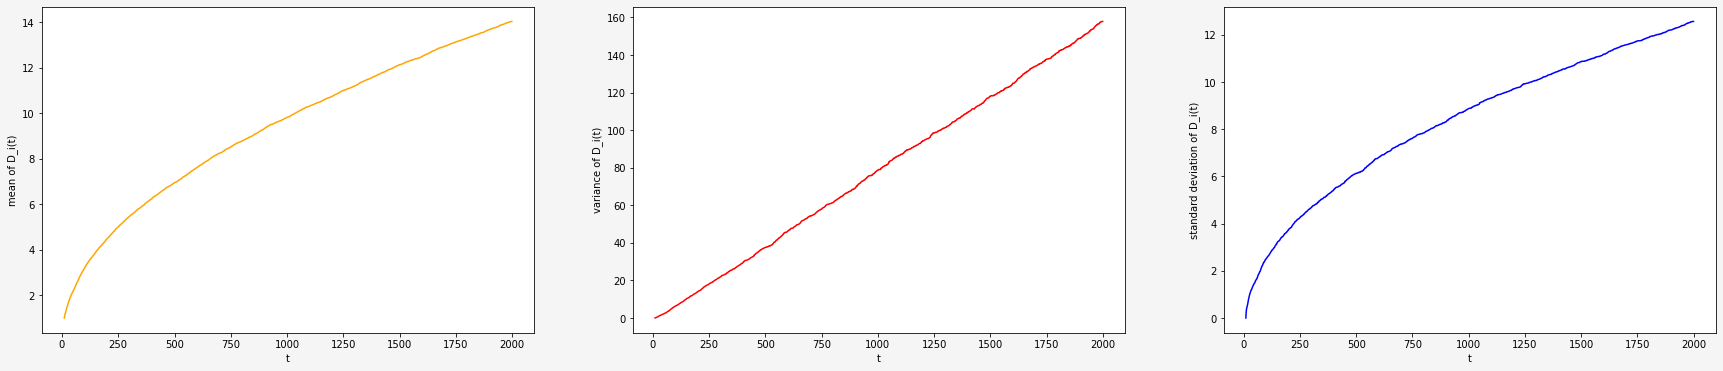

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =10; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

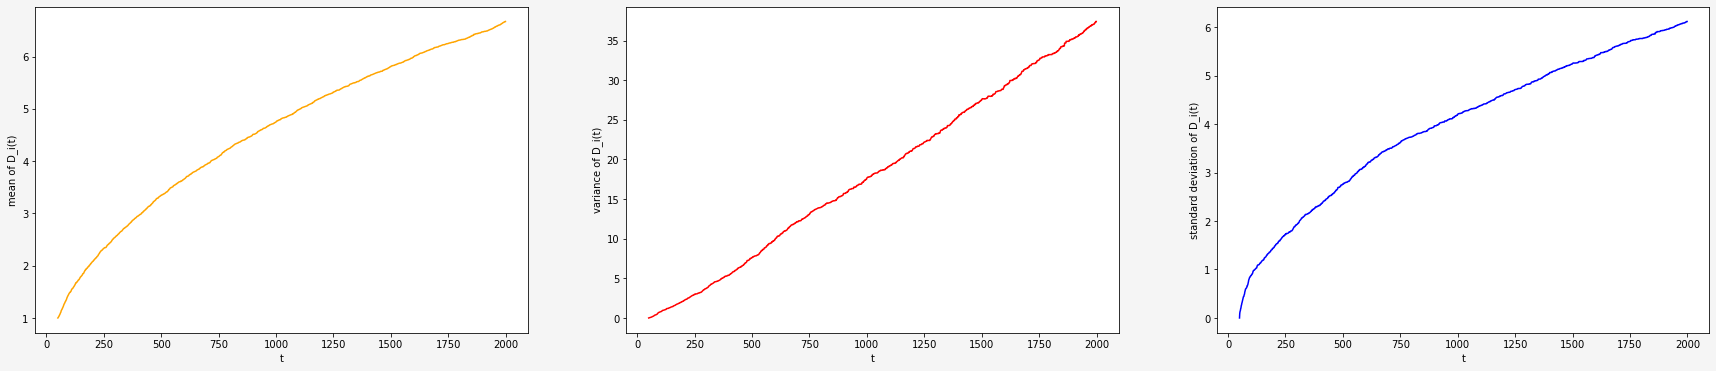

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =50; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

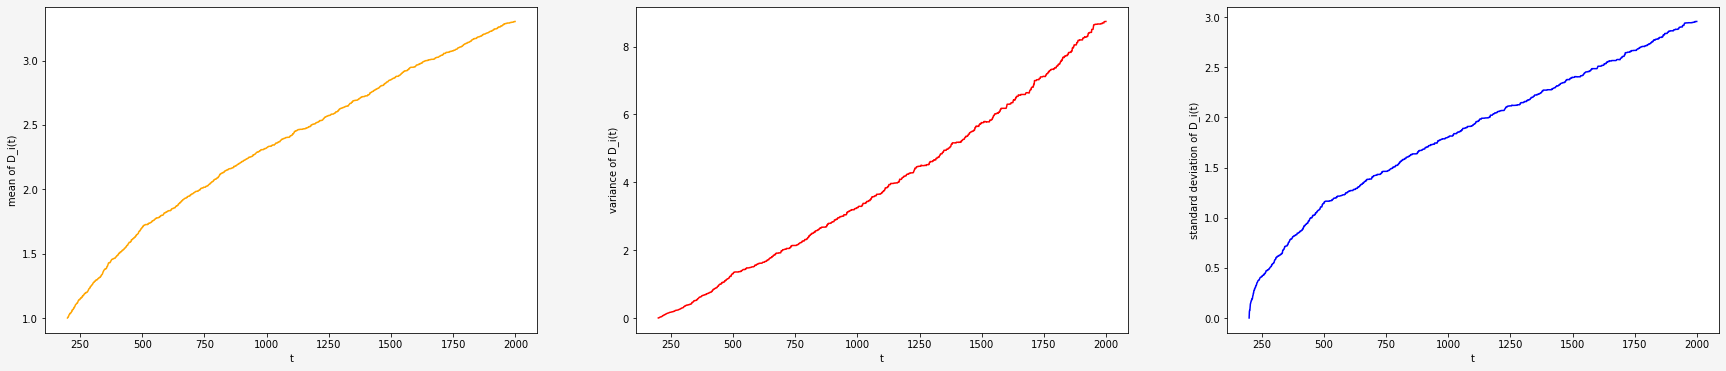

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; i =200; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

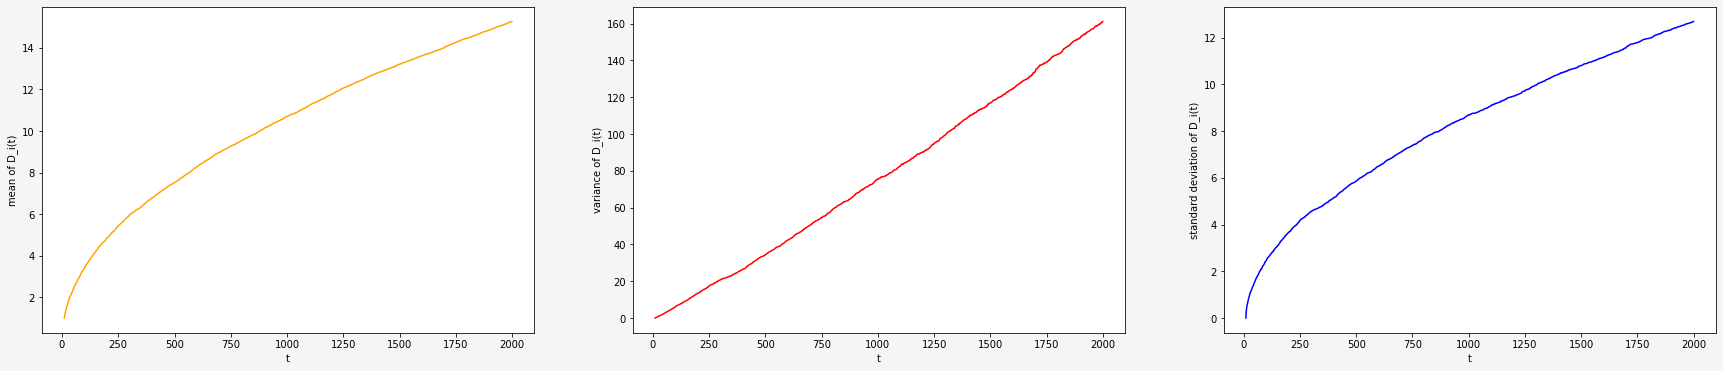

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =10; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

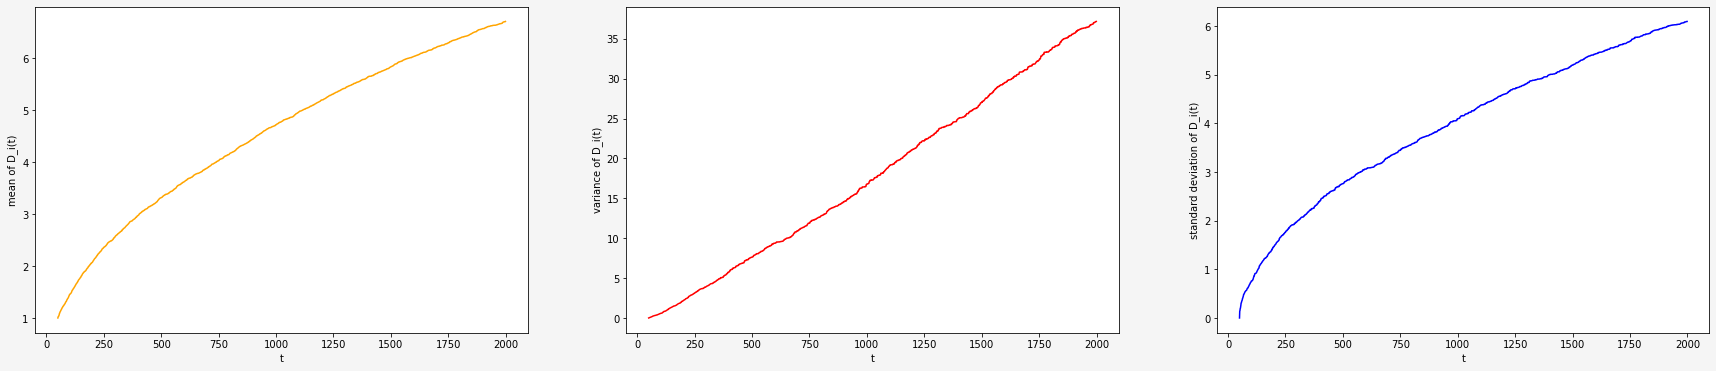

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =50; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

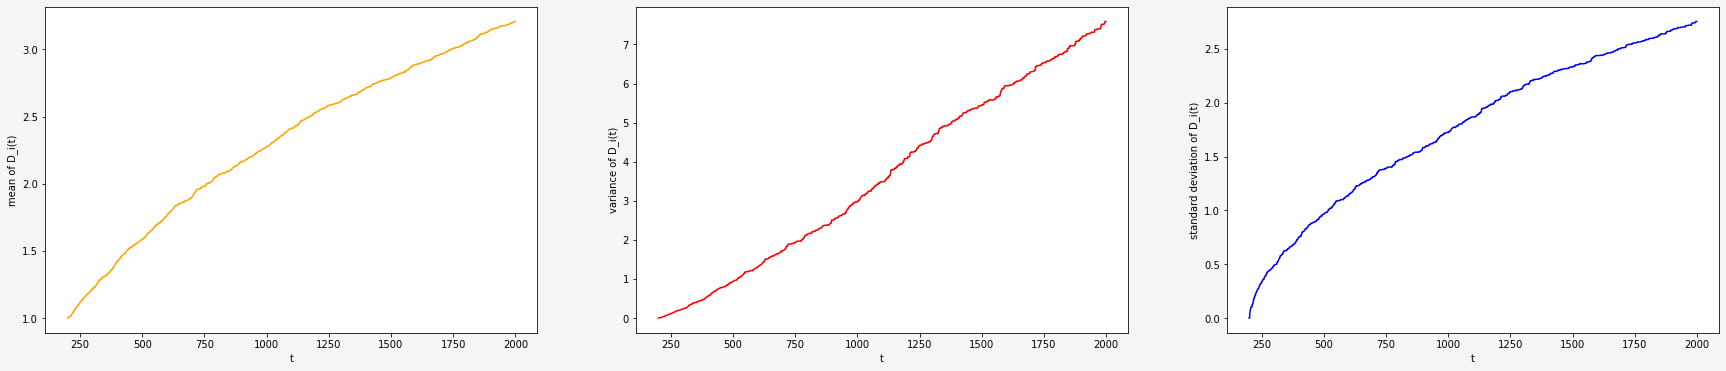

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; i =200; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

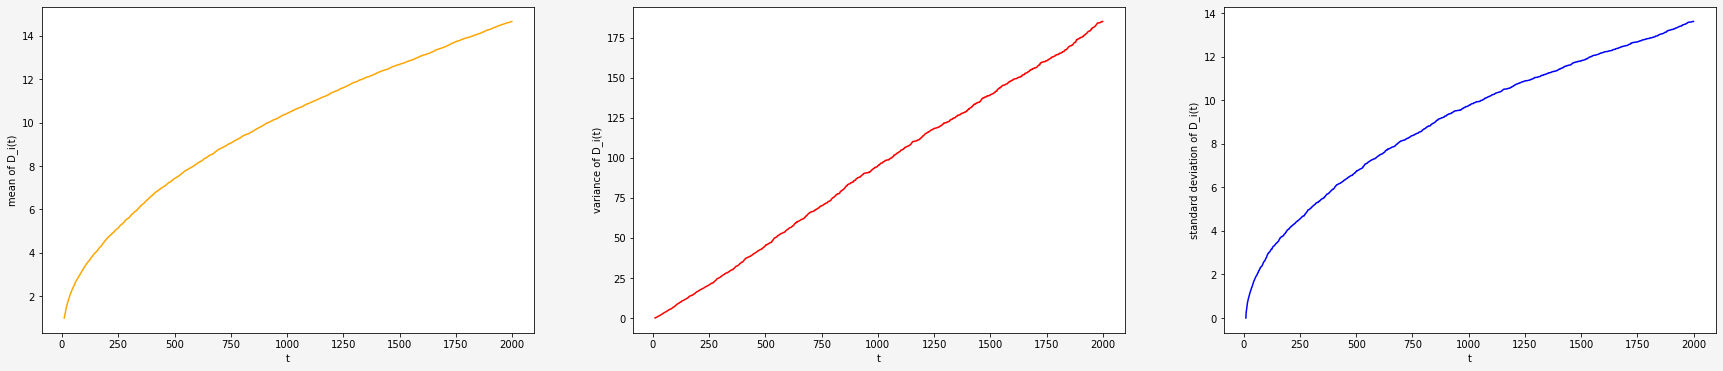

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =10; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

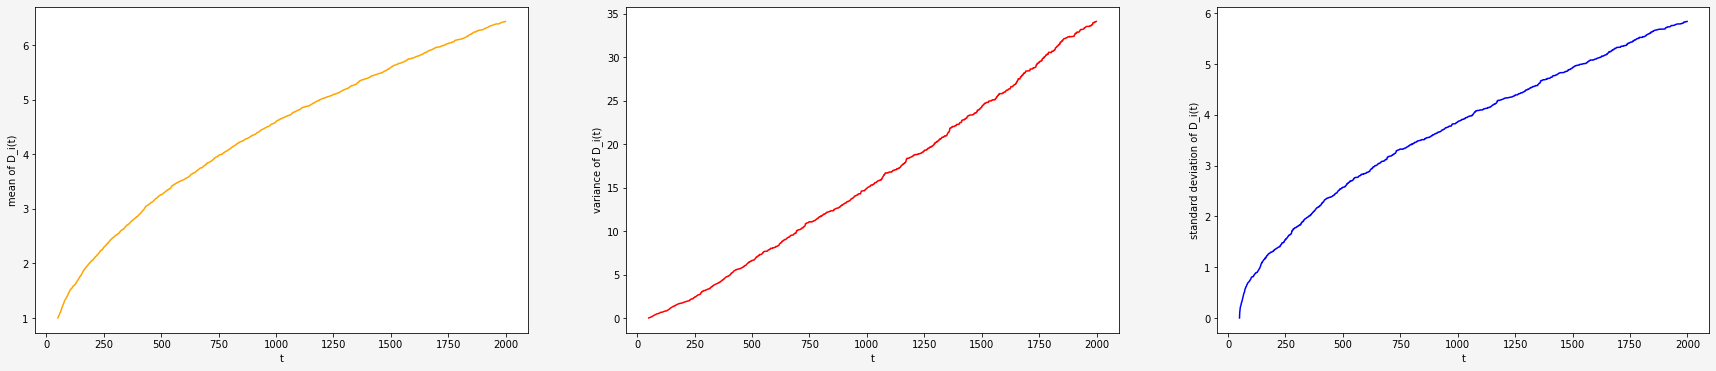

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =50; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

Text(0, 0.5, 'standard deviation of D_i(t)')

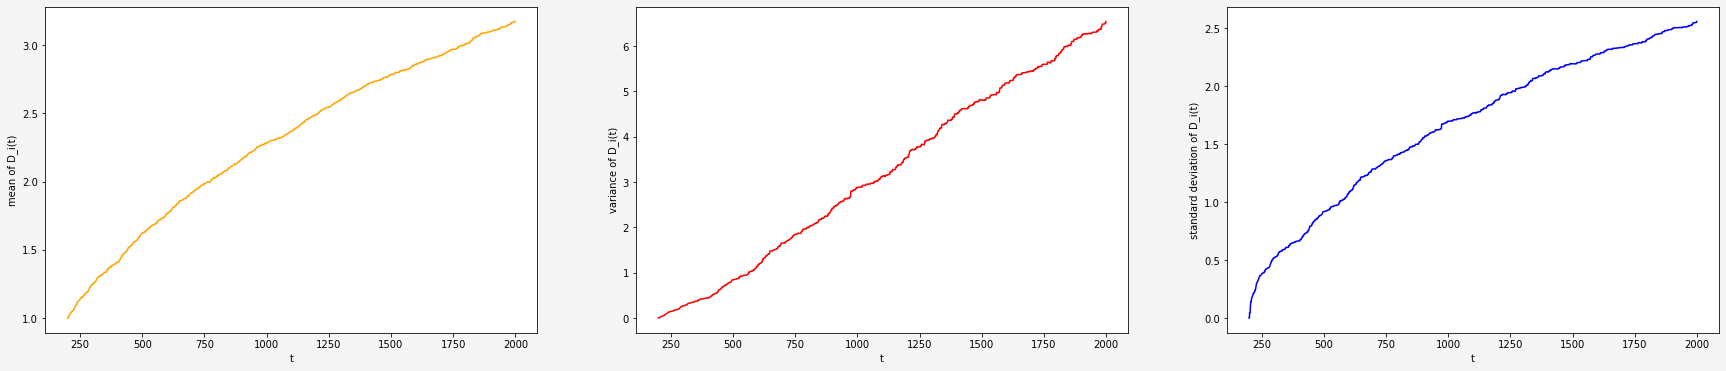

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; i =200; mode = "soft_one"
mytime, mymean, myvar, mysd = find_fixed_mean_sd(N, p, S, vertex = i, mode = mode, seed = seed)
title = f"seed = {seed} || {i}-th vertex || Graph parameters N = {N}, p = {p}, mode = {mode} || no. of iter = {S}"
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(mytime, mymean, color = "orange")
plt.xlabel("t"); plt.ylabel("mean of D_i(t)")
plt.subplot(1,3,2)
plt.plot(mytime, myvar, color = "red")
plt.xlabel("t"); plt.ylabel("variance of D_i(t)")
plt.subplot(1,3,3)
plt.plot(mytime, mysd, color = "blue")
plt.xlabel("t"); plt.ylabel("standard deviation of D_i(t)")

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')